## Assignment 1: Mortgage Approval Prediction - Part 1

Points: 7.5 pts.

Deliverable: HTML (zip) or PDF file to be submitted through Canvas.

**NOTE: PLEASE DO NOT USE CODE WHISPERER, CHATGPT, BARD, OR ANY OTHER SIMILAR TOOL FOR THIS ASSIGNMENT.** You can use Google search and StackOverflow to troubleshoot your code. The best resources, however, would be our own notebooks (McAfee_PredictiveModel and McAfee_PredictiveModel_v2).

#### Ian Roe

### Instructions:

The main objective of this assignment is to build, evaluate, and discuss a classification model that predicts whether a loan application gets approved. The Home Mortgage Disclosure Act (HMDA) requires many financial institutions to maintain, report, and publicly disclose information about mortgages. This dataset covers all mortgage decisions made in 2015 for the state of New York. This is a real-world data set publsihed by HMDA. 

**About HMDA:**

The Home Mortgage Disclosure Act (HMDA) requires many financial institutions to maintain, report, and publicly disclose loan-level information about mortgages. These data help show whether lenders are serving the housing needs of their communities; they give public officials information that helps them make decisions and policies; and they shed light on lending patterns that could be discriminatory. The public data are modified to protect applicant and borrower privacy.

Please refer to https://www.consumerfinance.gov/data-research/hmda/ for more information about HMDA.


**Data Feilds and Dictionary:**

Here is the data dictionary: https://files.consumerfinance.gov/hmda-historic-data-dictionaries/lar_record_codes.pdf

And here is the list of variables in the data: https://files.consumerfinance.gov/hmda-historic-data-dictionaries/lar_record_format.pdf

Please note that the original HMDA data set contains more variables that we are using in this assignment. Therefore, there are variables in the data dictionary that you don't find in the assignment data. 


**The Assignment:**

Variable "action_taken" is the target variable in this assignment. It has two possible values: 1, which means that the application was approved and the loan was originated, and 3, which means that the application was denied by the financial institution. Please note that in our notebook, we will use LabelEncoder to change 1s to 0s and 3s to 1s. Hence, the class labels in the data after applying the LabelEncoder would be 0s (originated) and 1s (denied). 

In the assignment we will use all of the other variables, except for the unique identifier ("ID"), to train a model that predicts "action_taken". We will then use a variety of metrics to evaluate the quality of this model. Subsequently, you will be asked to perform hyperparameter optimization to train a better model.   

Please carefully read the code and run the cells until you reach cells labeled as "Assignment Question". Provide your code and answers in the cell(s) below each question. After answering the questions and saving this notebook, please click on "File", select "Download as" and select "HTML (.html)" or "PDF" to download the notebook. Then, rename the notebook to "assignment1_firstName_lastName" and submit the notebook through Canvas.

Good Luck!

### 1. Notebook Styling and Package Management

In [58]:
import numpy as np # Library for math operations
import pandas as pd # Library for data handling
import sklearn # The machine learning library we will be using in this entire course
from sklearn import tree # Tree function is used for visualizing decision tree
from sklearn.metrics import * # Importing function that can be used to calculate different metrics
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier 
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier 
from sklearn.model_selection import train_test_split # Importing function that can split a dataset into training and testing set
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Importing functions for scaling the data
from sklearn.preprocessing import LabelEncoder # Importing function for processing the labels
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Importing GridSearchCV and RandomSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier # Importing the XGBoost Classifier 
import matplotlib.pyplot as plt # Importing the package for plotting
plt.style.use('fivethirtyeight') # Use the styling from FiveThirtyEight Website
import seaborn as sns # Importing another package for plotting

plt.rcParams['figure.figsize'] = [10, 6] ## plot size
plt.rcParams['axes.linewidth'] = 2.0 #set the value globally

### 2. Read the Data File

In [59]:
trainInput = pd.read_csv("a1_trainInput.csv") 
testInput = pd.read_csv("a1_testInput.csv")

In [60]:
trainInput.head(2)

,action_taken,applicant_income_000s,applicant_race_1,applicant_sex,lien_status,loan_purpose,loan_type,msamd,owner_occupancy,preapproval,property_type,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income,ID
0,3,220.0,5,1,1,3,1,24020.0,2,3,1,65400.0,175,1828.0,1064.0,3.65,3347.0,105.010002,0
1,1,115.0,5,1,1,1,3,40380.0,1,3,1,69700.0,239,1189.0,1019.0,5.50,2856.0,112.570000,1


In [61]:
trainInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   action_taken                    8756 non-null   int64  
 1   applicant_income_000s           8756 non-null   float64
 2   applicant_race_1                8756 non-null   int64  
 3   applicant_sex                   8756 non-null   int64  
 4   lien_status                     8756 non-null   int64  
 5   loan_purpose                    8756 non-null   int64  
 6   loan_type                       8756 non-null   int64  
 7   msamd                           8756 non-null   float64
 8   owner_occupancy                 8756 non-null   int64  
 9   preapproval                     8756 non-null   int64  
 10  property_type                   8756 non-null   int64  
 11  hud_median_family_income        8756 non-null   float64
 12  loan_amount_000s                87

In [62]:
trainInput.describe().T

,count,mean,std,min,25%,50%,75%,max
action_taken,8756.0,1.522613,0.878743,1.00,1.000000,1.000000,3.000000,3.000000
applicant_income_000s,8756.0,135.650868,201.523994,1.00,60.000000,92.000000,144.000000,5990.000000
applicant_race_1,8756.0,4.727387,1.035314,1.00,5.000000,5.000000,5.000000,7.000000
applicant_sex,8756.0,1.452033,0.623988,1.00,1.000000,1.000000,2.000000,4.000000
lien_status,8756.0,1.160347,0.503656,1.00,1.000000,1.000000,1.000000,3.000000
loan_purpose,8756.0,1.863751,0.930875,1.00,1.000000,1.000000,3.000000,3.000000
loan_type,8756.0,1.221905,0.522026,1.00,1.000000,1.000000,1.000000,4.000000
msamd,8756.0,32167.882366,9794.299459,10580.00,35004.000000,35614.000000,35614.000000,48060.000000
owner_occupancy,8756.0,1.078346,0.270003,1.00,1.000000,1.000000,1.000000,3.000000
preapproval,8756.0,2.744861,0.500830,1.00,3.000000,3.000000,3.000000,3.000000


In [63]:
trainInput.action_taken.value_counts()

action_taken
1    6468
3    2288
Name: count, dtype: int64

In [64]:
trainData = trainInput.drop(columns = ['action_taken','ID'])
trainLabels = LabelEncoder().fit_transform(trainInput.action_taken)

testData = testInput.drop(columns = ['action_taken','ID'])
testLabels = LabelEncoder().fit_transform(testInput.action_taken)

### 3. Create a Model:

In [65]:
clf = XGBClassifier(random_state = 1)
clf.fit(trainData, trainLabels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

### 4. Evaluate the Model

In [66]:
from custom_functions import plot_conf_mat, plot_roc_curve, plot_feature_importance, calculateMetricsAndPrint

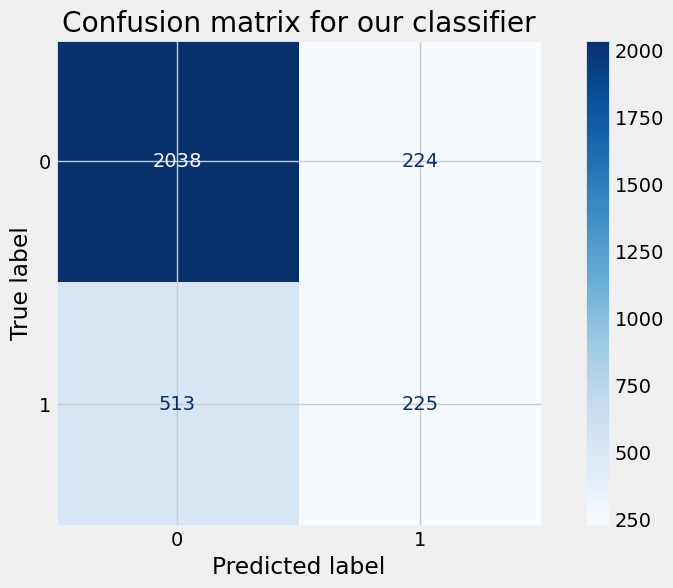

In [67]:
plot_conf_mat(clf, # The classifier object
              testData, # The test data set aside for evaluation in train_test_split
              testLabels # Actual labels
             )

In [68]:
predictedProbabilities = clf.predict_proba(testData)
predictedLabels = clf.predict(testData) 
calculateMetricsAndPrint(predictedLabels, predictedProbabilities, testLabels)

Accuracy: 75.43
PrecisionNegative: 79.89
PrecisionPositive: 50.11
RecallNegative: 90.10
RecallPositive: 30.49
AUC Score: 69.59



In [69]:
print("F1 Score:",f1_score(testLabels, predictedLabels, average='micro'))

F1 Score: 0.7543333333333333


In [70]:
positiveProbabilities = predictedProbabilities[:,1]

AUC Score = 69.585


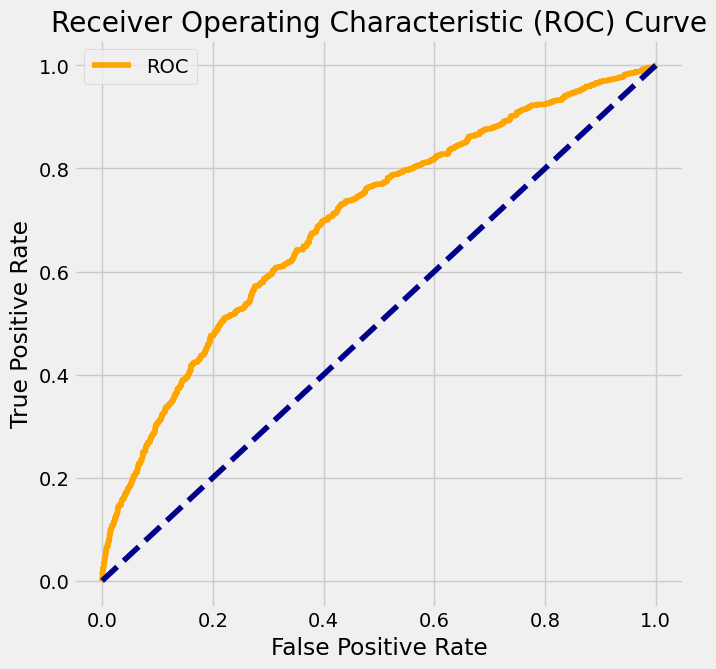

In [71]:
plot_roc_curve(testLabels, # Actual labels
               positiveProbabilities, # Prediction scores for the positive class
               pos_label = 1 # Indicate the label that corresponds to the positive class
              )

#### ["Assignment Question"]

#### Q1 [1 point]: Based on the confusion matrix, what percentage of the originated loan applications were predicted by the model to be originated? [1 point]

In [72]:
# Based on the confusion matrix, 79.89% of the originated loan applications were correctly predicted by the model to be originated.

#### ["Assignment Question"]

#### Q2 [1 point]: Based on the confusion matrix, what percentage of the loan applications that were predicted by the model to be originated were originated? [1 point]

In [73]:
# Based on the confusion matrix, 90.10% of the loan applications that were predicted by the model to be originated were actually originated.

#### ["Assignment Question"]

#### Q3 [1 point]: Imagine that a financial instituition has been using this model to decide whether a loan application should be approved (originated) or denied. For the next year, the instituition, based on its risk portfolio, is interested in approving more loan applications. Should they increase the threshold or decrease the threshold to obtain the class labels for the loan applications?    

**Hint:** In binary classification tasks, machine learning models like like the one we built above often provide both probability scores and class labels as outputs. The clf.predict() method, where clf represents a classifier, is commonly used to obtain the predicted class labels directly. Here's how it works in the context of a classifier with a default threshold of 0.5:

1- Probability Scores: When a classifier predicts the outcomes of new data points, it internally computes a probability score for each class. In binary classification, this typically involves calculating the probability of the data point belonging to the positive class (class label 1).

2- Default Threshold: The default threshold for converting probability scores into class labels is typically set at 0.5. This means that if the probability of the positive class for a given data point is greater than or equal to 0.5, the classifier will assign it to the positive class. Conversely, if the probability is less than 0.5, the data point is assigned to the negative class (class label 0).

3- clf.predict() Method: When you call the clf.predict() method on a dataset (e.g., testData), the classifier applies this threshold to the probability scores it has computed. It then returns the resulting class labels. This process is effectively a binary decision-making step where the probability score is compared against the 0.5 threshold to decide the final class label.

It's important to understand that the choice of 0.5 as the threshold is a convention and is appropriate when both classes are equally important. However, in many real-world scenarios, this threshold might need to be adjusted based on the specific requirements of the task, such as dealing with imbalanced classes or when the costs of false positives and false negatives are significantly different.

In [74]:
# Based on this model's predictions and the financial institution's goal to originate more loan applications in the next year, the financial institution should decrease the default threshold for predicting loan origination.
# By decreasing the threshold, the model would classify more loan applications with lower probability scores for origination, effectively meeting the financial institution's goal of approving more loan applications.                                                                                                                                                                          

#### ["Assignment Question"]

#### Q4 [1 point]: Among the evaluation metrics presented in the cells under section 4. Evaluate the Model, which one of them is used to measure the "confidence" of the model in making the predictions? Can you provide a quick description of this metric? 

In [75]:
# The AUC (Area Under the Curve) is the metric used to measure the "confidence" of the model in making predictions. The AUC measures the area under the entire Receiver Operating Characteristic (ROC) Curve between two points, (0,0) and (1,1), to provide the sum of classification threshold performance.
# The AUC ranges in value from 0 to 1, where an AUC of 0 indicates zero correct predictions, an AUC of 0.5 indicates no discrimination ability (50/50 chance), and an AUC of 1 indicates 100% accuracy. 

#### ["Assignment Question"]

#### Q5 [2 points]: In the model that we created above, we did not change the default values of any of the parameters. However, we could have used a different values for these parameters. To determine the best set of values, we can use RandomizedSearchCV and GridSearchCV to search for the right values for model. In the cells below, please use RandomizedSearchCV and GridSearchCV to find reasonable values for the parameters in the model. Start with RandomizedSearchCV and then, based on its output, try GridSearchCV. In the RandomizedSearchCV use the following specifications:

In [76]:
params = {
    "n_estimators" : [50,150,200],
    "max_depth" : np.arange(2,10,1),
    "learning_rate" : np.arange(0.1,0.9,0.1)
}

clf = XGBClassifier(objective="binary:logistic", 
                    n_jobs=16,
                    random_state = 1)

rs_model = RandomizedSearchCV(clf,
                              param_distributions=params,
                              n_iter=10, # We are asking for five models
                              scoring='roc_auc',
                              cv=3,
                              verbose=3,
                              random_state = 1)

#model fitting
rs_model.fit(trainData,trainLabels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END learning_rate=0.2, max_depth=8, n_estimators=200;, score=0.699 total time=   0.3s
[CV 2/3] END learning_rate=0.2, max_depth=8, n_estimators=200;, score=0.698 total time=   0.3s
[CV 3/3] END learning_rate=0.2, max_depth=8, n_estimators=200;, score=0.690 total time=   0.3s
[CV 1/3] END learning_rate=0.30000000000000004, max_depth=9, n_estimators=50;, score=0.706 total time=   0.1s
[CV 2/3] END learning_rate=0.30000000000000004, max_depth=9, n_estimators=50;, score=0.707 total time=   0.1s
[CV 3/3] END learning_rate=0.30000000000000004, max_depth=9, n_estimators=50;, score=0.698 total time=   0.1s
[CV 1/3] END learning_rate=0.7000000000000001, max_depth=7, n_estimators=200;, score=0.698 total time=   0.3s
[CV 2/3] END learning_rate=0.7000000000000001, max_depth=7, n_estimators=200;, score=0.675 total time=   0.2s
[CV 3/3] END learning_rate=0.7000000000000001, max_depth=7, n_estimators=200;, score=0.673 total time=  

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=16,
                                           num_parallel_tree=None,
                                           random_state=1, ...),
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [50, 150, 200]},
                   random_state=1, scoring='roc_auc', verbose=3)

In [77]:
#parameters selected
rs_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=16,
              num_parallel_tree=None, random_state=1, ...)

In [78]:
rs_model.best_estimator_.learning_rate

0.1

#### Q5 [continued]: Now, please write the code to perform GridSearchCV, obtain the best model (estimator) and evaluate it on testData to report AUC, accuracy, precision, and recall, and to create ROC and confusion matrix plots:

Accuracy: 77.40
PrecisionNegative: 79.49
PrecisionPositive: 59.55
RecallNegative: 94.39
RecallPositive: 25.34
AUC Score: 72.22

F1 Score: 0.774
AUC Score = 72.220


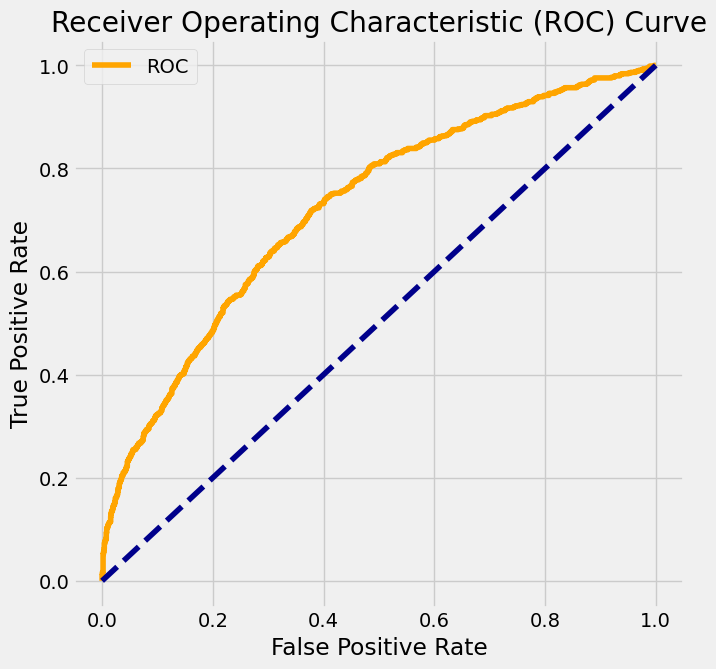

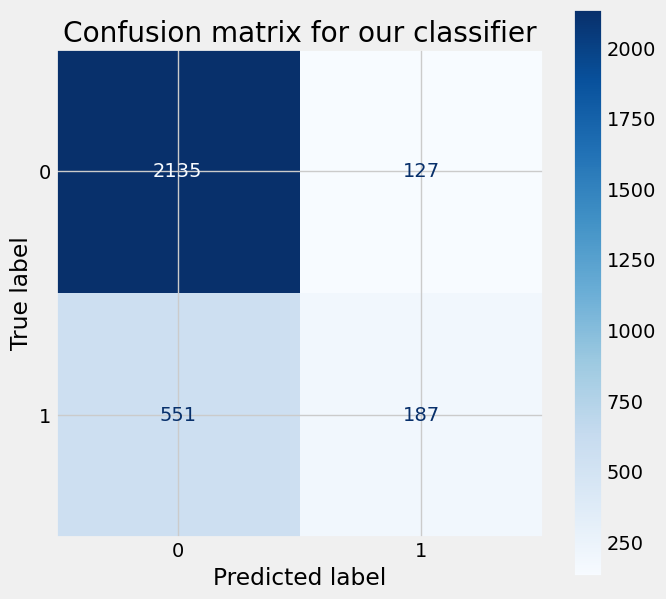

In [79]:
from custom_functions import plot_conf_mat, plot_roc_curve, calculateMetricsAndPrint
from sklearn.metrics import f1_score

best_clf = grid_search.best_estimator_

predicted_probs = best_clf.predict_proba(testData)
predicted_labels = best_clf.predict(testData)

calculateMetricsAndPrint(predicted_labels, predicted_probs, testLabels)
print("F1 Score:", f1_score(testLabels, predicted_labels, average='micro'))

positive_probabilities = predicted_probs[:,1]
plot_roc_curve(testLabels, positive_probabilities, pos_label=1)

plot_conf_mat(best_clf, testData, testLabels)

#### ["Assignment Question"]

#### Q6 [1.5 points]: Please use the code below to use HyperOpt to find the best values for the parameters. Then, train a model with those values and evaluate it on testData to report AUC, accuracy, precision, and recall, and to create ROC and confusion matrix plots:

In [80]:
!pip install hyperopt

In [81]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [82]:
space={'max_depth': hp.quniform("max_depth", 3, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 80, 200, 10),
        'eta': hp.uniform ('eta', 0.05,0.6),
        'seed': 0,
        'random_state': 1
    }

In [83]:
from sklearn.metrics import roc_auc_score

def objective(space):
    clf=XGBClassifier(
        random_state = 1,
        eta = space['eta'],
        n_estimators = int(space['n_estimators']), 
        max_depth = int(space['max_depth']))
    
    evaluation = [( trainData, trainLabels), ( testData, testLabels)]
    
    clf.fit(trainData, trainLabels,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    
    pred = clf.predict_proba(testData)[:,1]
    accuracy = roc_auc_score(testLabels, pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [84]:
%%capture --no-display

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [85]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'eta': 0.38769741423369825, 'max_depth': 4.0, 'n_estimators': 150.0}


#### Q6 [continued]: Now, train XGBClassifier using the parameter values above. Then, evaluate it on testData to report AUC, accuracy, precision, and recall, and to create ROC and confusion matrix plots. 

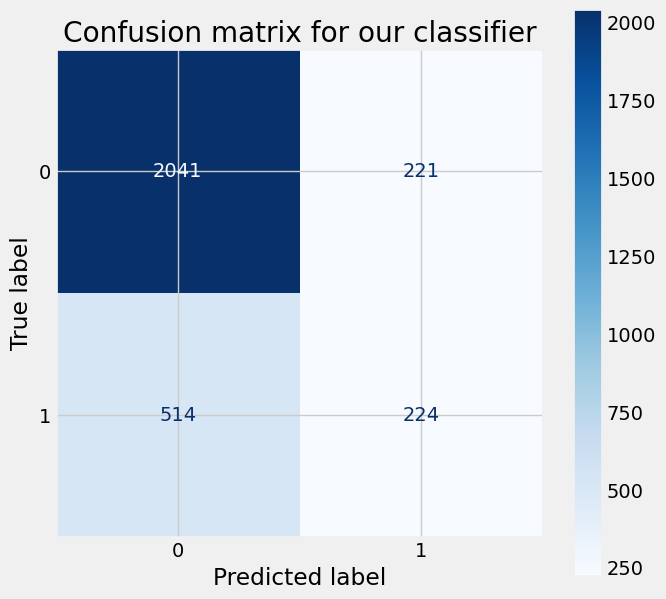

Accuracy: 75.50
PrecisionNegative: 79.88
PrecisionPositive: 50.34
RecallNegative: 90.23
RecallPositive: 30.35
AUC Score: 69.29

F1 Score: 0.755
AUC Score = 69.290


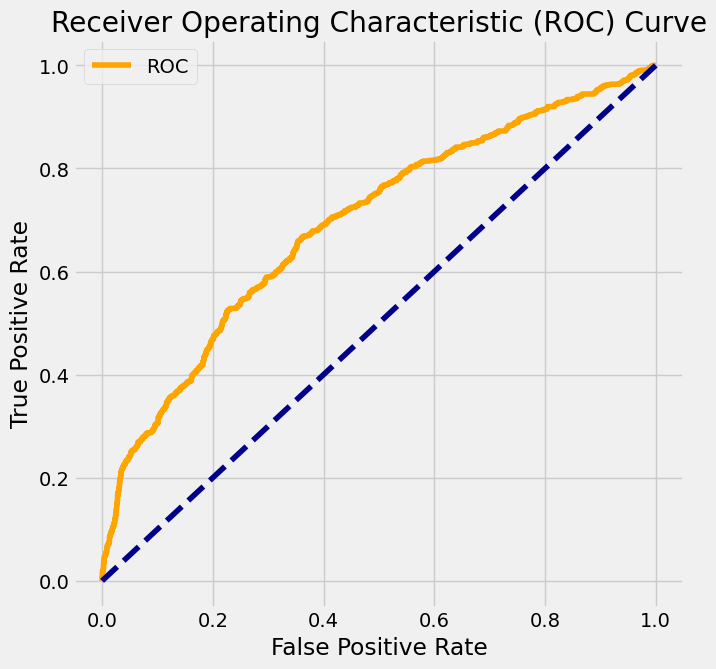

In [86]:
best_clf = XGBClassifier(
    random_state=1,
    learning_rate=best_hyperparams['eta'],
    n_estimators=int(best_hyperparams['n_estimators']),
    max_depth=int(best_hyperparams['max_depth'])
)
best_clf.fit(trainData, trainLabels)

plot_conf_mat(best_clf, testData, testLabels)

predictedProbabilities = best_clf.predict_proba(testData)
predictedLabels = best_clf.predict(testData)
calculateMetricsAndPrint(predictedLabels, predictedProbabilities, testLabels)

print("F1 Score:", f1_score(testLabels, predictedLabels, average='micro'))

positiveProbabilities = predictedProbabilities[:, 1]
plot_roc_curve(testLabels, positiveProbabilities, pos_label=1)